# 新型冠状病毒数据分析演示

新型冠状病毒（2019-nCov) 的疫情牵动着全世界人民的心，而理性地对待离不开数据和分析。为了让人民大众及时了解情况，很多网站都公布疫情的实时信息。比方说[丁香园疫情实时动态](https://ncov.dxy.cn/ncovh5/view/pneumonia)， [腾讯疫情实时追踪](https://news.qq.com/zt2020/page/feiyan.htm) 等等。这些网站的内容都是一样的，它们快速地为公众提供了信息，增加了透明度。但是如果读者希望对疫情有进一步的了解，这些网站就不够用了。比方说，如果你想得到过去十天湖北省确诊人数，那就只能从趋势图上作个估计了。再比方说，如果你想对比一下湖南、广东、浙江三省在过去十天的新增确诊人数，那么单凭网页数据也无能为力了。

为了取得可以供研究使用的数据，[DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) 项目利用网络爬虫不断从网上抓取数据，更新并存成 CSV 格式。然而，这个 CSV 文件包含的是不同时刻网页上的信息片段，有的时候只有这几个城市，有的时候只有那几个城市，数据并不规整。

为了进一步方便用户进行研究，本项目[nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) 提供了一些基本工具，把实时数据规整为每日数据，方便用户按时间、省份、城市等方法检索。同时，本项目还提供了基本的时间序列和横向分析作图函数，方便用户取得基本信息。

以下是基本使用方法演示：

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. 获取原始 CSV 数据

In [113]:
data = utils.load_chinese_data()

最近更新于:  2020-02-09 13:33:40.433000
数据日期范围:  2020-01-24 to 2020-02-09
数据条目数:  27138


In [114]:
data.head(3)  # 查看数据形式

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,河南省,信阳,1033,0,136,6,205,0,24,0,2020-02-09 13:33:40.433,2020-02-09
1,河南省,南阳,1033,0,136,6,133,0,16,2,2020-02-09 13:33:40.433,2020-02-09
2,河南省,郑州,1033,0,136,6,126,0,31,0,2020-02-09 13:33:40.433,2020-02-09


## 2. 把实时数据整合成每日数据

In [115]:
daily_frm = utils.aggDaily(data, clean_data=True)

In [116]:
daily_frm.tail(3)

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
778,黑龙江省,鹤岗,4,0,0,2020-02-09 08:55:45.123,2020-02-09
780,黑龙江省,黑河,2,0,0,2020-02-09 08:55:45.123,2020-02-09
773,黑龙江省,齐齐哈尔,27,0,0,2020-02-09 08:55:45.123,2020-02-09


## 3. 数据查看

### 3.1 提取部分信息

#### 用 provinceName 检索省级数据

In [117]:
daily_frm[daily_frm['provinceName'] == '广东省']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
26159,广东省,中山,2,0,0,2020-01-24 23:35:03.158,2020-01-24
26153,广东省,佛山,7,0,0,2020-01-24 23:35:03.158,2020-01-24
26154,广东省,广州,7,0,0,2020-01-24 23:35:03.158,2020-01-24
26155,广东省,惠州,5,0,0,2020-01-24 23:35:03.158,2020-01-24
26151,广东省,深圳,15,2,0,2020-01-24 23:35:03.158,2020-01-24
...,...,...,...,...,...,...,...
90,广东省,珠海,83,4,0,2020-02-09 13:22:30.367,2020-02-09
98,广东省,肇庆,14,3,1,2020-02-09 13:22:30.367,2020-02-09
102,广东省,茂名,9,1,0,2020-02-09 13:22:30.367,2020-02-09
99,广东省,阳江,13,1,0,2020-02-09 13:22:30.367,2020-02-09


#### 用 cityName 检索市级数据

In [118]:
daily_frm[daily_frm['cityName'] == '武汉']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
26350,湖北省,武汉,495,31,23,2020-01-24 17:30:09.978,2020-01-24
25175,湖北省,武汉,572,32,38,2020-01-25 23:55:35.775,2020-01-25
24526,湖北省,武汉,618,40,45,2020-01-26 13:50:35.848,2020-01-26
23347,湖北省,武汉,698,42,63,2020-01-27 16:42:57.343,2020-01-27
22543,湖北省,武汉,1590,47,85,2020-01-28 16:36:17.441,2020-01-28
21349,湖北省,武汉,1905,54,104,2020-01-29 20:34:44.154,2020-01-29
20170,湖北省,武汉,2261,54,129,2020-01-30 22:24:37.371,2020-01-30
18530,湖北省,武汉,2639,103,159,2020-01-31 22:06:41.473,2020-01-31
16239,湖北省,武汉,3215,106,192,2020-02-01 19:49:55.626,2020-02-01
14366,湖北省,武汉,4109,175,224,2020-02-02 20:50:05.247,2020-02-02


#### 用 updateDate 检索单日数据

In [119]:
daily_frm[daily_frm['updateDate'] == pd.to_datetime('2020-01-27')]

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
23384,上海市,嘉定区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
23374,上海市,外地来沪人员,23,3,0,2020-01-27 15:56:40.534,2020-01-27
23385,上海市,奉贤区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
23383,上海市,宝山区,1,0,0,2020-01-27 15:56:40.534,2020-01-27
23378,上海市,徐汇区,3,0,0,2020-01-27 15:56:40.534,2020-01-27
...,...,...,...,...,...,...,...
23877,黑龙江省,哈尔滨,8,0,0,2020-01-27 09:10:03.105,2020-01-27
23878,黑龙江省,大庆,5,0,0,2020-01-27 09:10:03.105,2020-01-27
23880,黑龙江省,牡丹江,1,0,0,2020-01-27 09:10:03.105,2020-01-27
23879,黑龙江省,绥化,3,0,1,2020-01-27 09:10:03.105,2020-01-27


#### 用 utils.add_dailyNew() 加入每日新增确诊、死亡、治愈人数

In [120]:
daily_frm = utils.add_dailyNew(daily_frm)

In [121]:
daily_frm[daily_frm['cityName'] == '武汉'][['confirmed', 'dailyNew_confirmed', 'dead', 'dailyNew_dead', 'cured', 'dailyNew_cured', 'updateDate']][:5]

,confirmed,dailyNew_confirmed,dead,dailyNew_dead,cured,dailyNew_cured,updateDate
26350,495,NaN,23,NaN,31,NaN,2020-01-24
25175,572,77.0,38,15.0,32,1.0,2020-01-25
24526,618,46.0,45,7.0,40,8.0,2020-01-26
23347,698,80.0,63,18.0,42,2.0,2020-01-27
22543,1590,892.0,85,22.0,47,5.0,2020-01-28


### 3.2 时序比较图 utils.tsplot_conf_dead_cured()

#### 全国累计确诊、每日新增确诊、死亡、治愈时间序列图

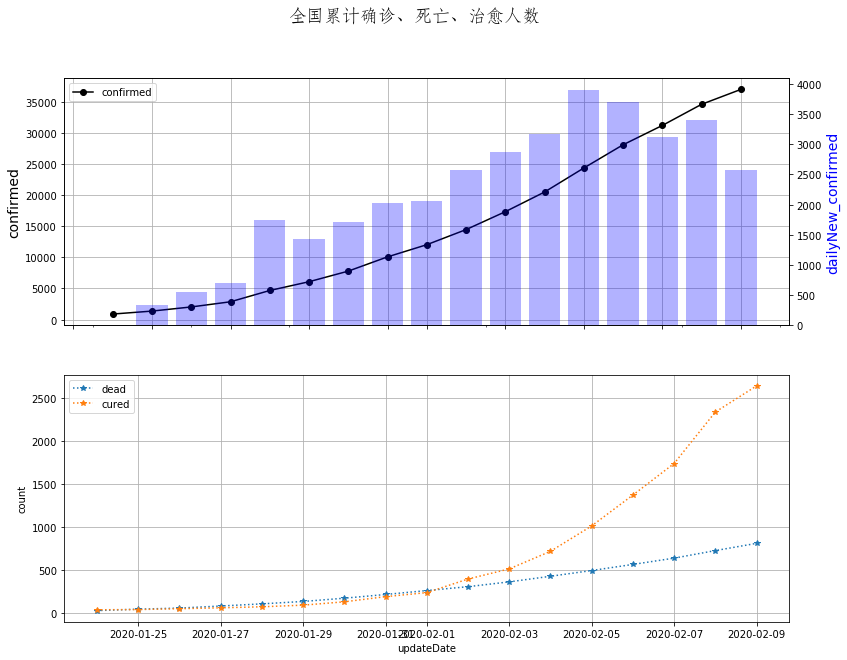

In [122]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title_prefix='全国')
plt.show()

#### 单个省份的时间序列也很容易，只要把想要的省份数据检索出来作为输入就可以了

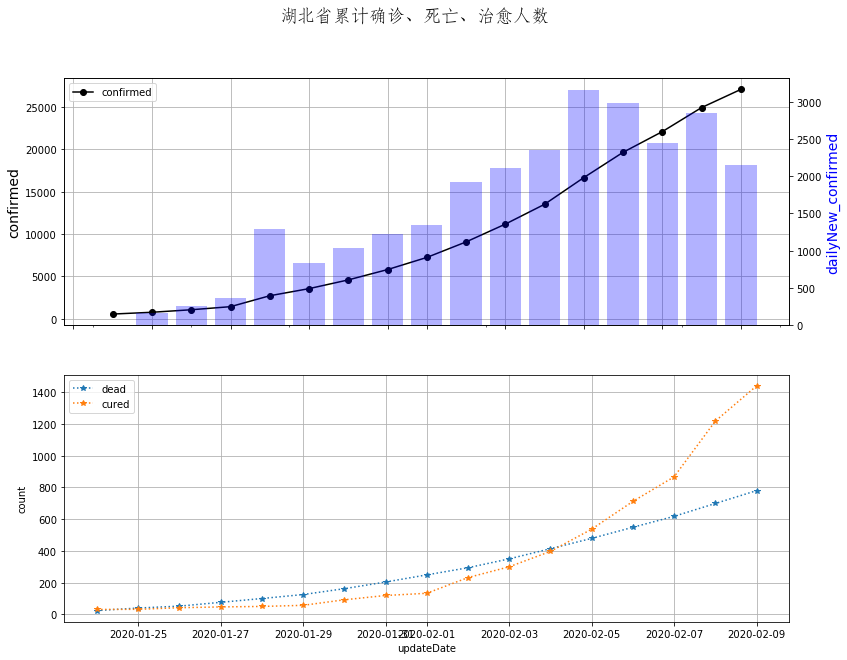

In [123]:
province = '湖北省'   # 输入你所要的省份
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['provinceName'] == province], title_prefix=province)
plt.show()                                  

#### 单个城市用法也是一样的, 还可以使用 logy=True 画指数图，看人数是否指数增长

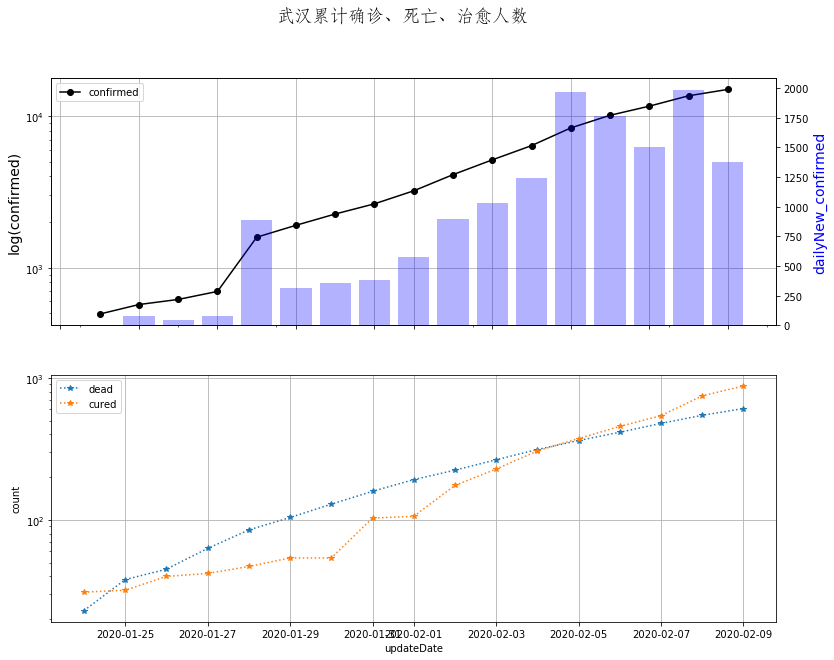

In [124]:
city = '武汉'
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['cityName'] == city], title_prefix=city, logy=True)
plt.show()  

### 3.3 横向比较图 utils.cross_sectional_bar()

#### 各省份在2月三号确诊数比较

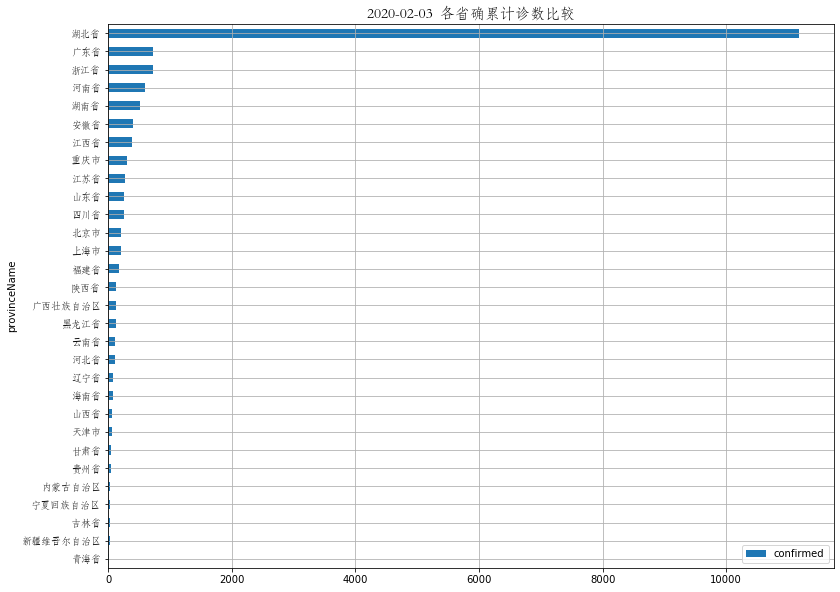

In [125]:
utils.cross_sectional_bar(daily_frm, '2020-02-03', col='confirmed', groupby='provinceName', title='各省确累计诊数比较')

#### 湖北省各地2月1号死亡数比较

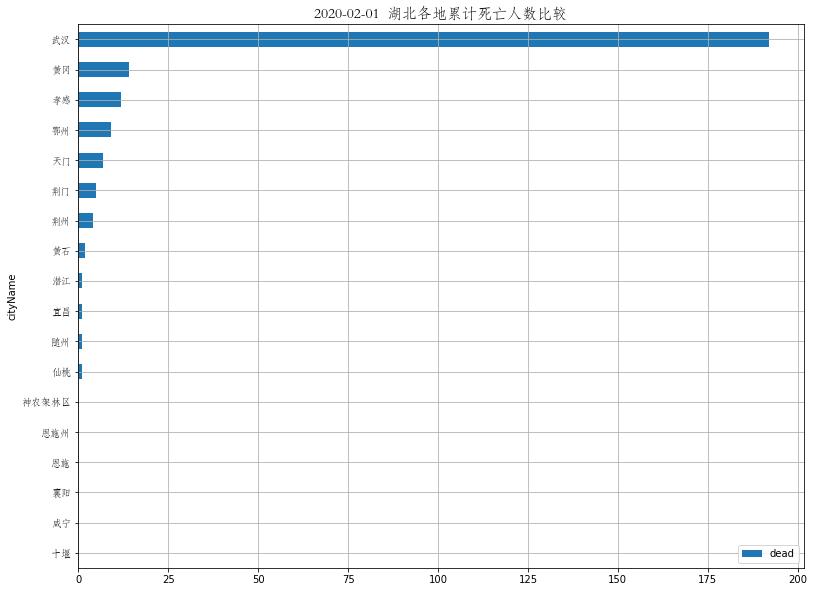

In [126]:
utils.cross_sectional_bar(daily_frm[daily_frm['provinceName'] == '湖北省'], '2020-02-01', col='dead', 
                        groupby='cityName', title='湖北各地累计死亡人数比较')

#### 全国2月5日新增确诊最多的十个城市 （用 largestN 参数限制横条数目）

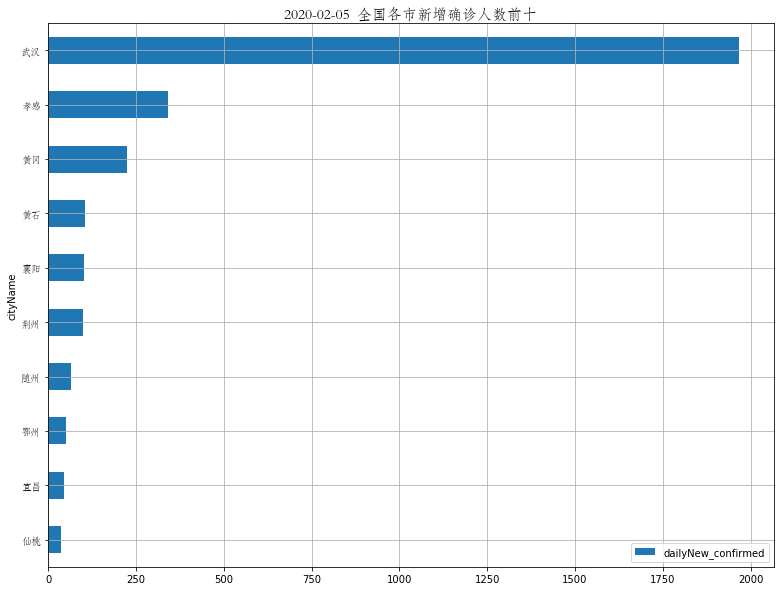

In [127]:
utils.cross_sectional_bar(daily_frm, '2020-02-05', col='dailyNew_confirmed', 
                        groupby='cityName', title='全国各市新增确诊人数前十', largestN=10)